<a href="https://colab.research.google.com/github/Saikrishna2472/INFO-5731.020-7886-Assignment-1/blob/main/paleru_jayasaikrishna_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Load the dataset
train_data = pd.read_csv('train.csv')  # Replace with the actual path to your train.csv file

# Combine relevant textual columns
text_columns = [
    'Neighborhood',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'Foundation',
    'Exterior1st',
    'SaleCondition'
]

# Fill missing values with an empty string and combine text columns into a single corpus
corpus = train_data[text_columns].fillna("").agg(" ".join, axis=1)

# Simple text preprocessing: lowercasing and removing non-alphabetic characters
processed_corpus = corpus.str.lower().str.replace(r'[^a-z\s]', '', regex=True)

# Convert the processed text into a Document-Term Matrix (DTM)
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(processed_corpus)

# Fit the LDA model
n_topics = 10  # Number of topics
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(dtm)

# Function to display topics
def display_topics(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(f"Topic {topic_idx + 1}: {' '.join(top_features)}")
    return topics

# Display the top 10 topics
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda_model, feature_names)
for topic in topics:
    print(topic)




Topic 1: wd sdng fam story normal cblock gable hip names pconc
Topic 2: duplex mitchel gable sfoyer normal cblock slab story plywood edwards
Topic 3: vinylsd story gable pconc normal fam collgcr sawyerw twnhse blmngtn
Topic 4: pconc story fam vinylsd partial hip gable normal nridght somerst
Topic 5: gable fam normal fin brktil oldtown metalsd cblock brkside story
Topic 6: metalsd story gable edwards normal pconc cblock twnhse somerst twnhs
Topic 7: gable normal story cblock cemntbd twnhse twnhs hdboard pconc clearcr
Topic 8: fam abnorml cblock gable plywood story normal sawyer slvl vinylsd
Topic 9: pconc fam gable normal story gilbert vinylsd noridge hdboard slvl
Topic 10: cblock fam normal story gable hdboard names hip nwames metalsd


Topic 1: Construction Materials and Story Styles
Top Terms: wd sdng, fam, story, normal, cblock, gable, hip, names, pconc
Description: This topic seems to cover the type of construction materials used-wood siding, cinder block, poured concrete-and the general style of single-family (fam) housing, such as those with gabled or hipped roofs.

Topic 2: Duplex Housing and Foundation Types
Top Terms: duplex, mitchel, gable, sfoyer, normal, cblock, slab, story, plywood, edwards
Description: This cluster focuses on the duplex housing styles, such as split foyer designs, plus associated foundation materials like cinder block (cblock) and slab foundations, and neighborhoods like Mitchel and Edwards.

Topic 3: Vinyl Siding and Neighborhood Variability
Top Terms: vinylsd, story, gable, pconc, normal, fam, collgcr, sawyerw, twnhse, blmngtn
Description: The topic showcases homes that have vinyl siding, gable roofs, and poured concrete foundations. It also mentions neighborhoods: College Creek, Sawyer West, Bloomington, which might imply a certain type of community.

Topic 4: Partial Finishing and Architectural Details
Top Terms: pconc, story, fam, vinylsd, partial, hip, gable, normal, nridght, somerst
Description: This cluster represents partial finishing of homes (partial) with some architectural details, like hip and gable roofs. There is also a geographic component with the use of neighborhoods like Northridge and Somerset.

Topic 5: Traditional Construction and Older Neighborhoods
Top Terms: gable, fam, normal, fin, brktil, oldtown, metalsd, cblock, brkside, story
Description: Traditional construction materials in older neighborhoods like Old Town and Brookside are discussed. The term fin suggests finishing details.

Topic 6: Metal Siding and Townhouses
Top Terms: metalsd, story, gable, edwards, normal, pconc, cblock, twnhse, somerst, twnhs
Description: Emphasizes townhouse/twnhse style homes with metal siding and gable roofs, including neighborhoods such as Edwards and Somerset.

Topic 7: Townhouses and Modern Exteriors
Top Terms: gable, normal, story, cblock, cemntbd, twnhse, twnhs, hdboard, pconc, clearcr
Description: The topic is townhouse architecture, with modern exterior materials such as cement board and hard board, with neighborhoods like Clear Creek.

Topic 8: Family Housing and Abnormal Sales
Top Terms: fam, abnorml, cblock, gable, plywood, story, normal, sawyer, slvl, vinylsd
Description: Outlines family-style homes with abnormal sale conditions (abnorml) along with materials like plywood, cinder block, and vinyl siding. Sawyer and other neighborhoods are mentioned.

Topic 9: Family Homes with Sloped Living Areas
Top Terms: pconc, fam, gable, normal, story, gilbert, vinylsd, noridge, hdboard, slvl
Description: Family homes with poured concrete foundations, vinyl siding, and neighborhoods such as Gilbert and Northridge. The term slvl (split level) indicates multiple floor levels.

Topic 10: Foundations and Diverse Construction Materials
Top Terms: cblock, fam, normal, story, gable, hdboard, names, hip, nwames, metalsd
Description: Points to foundation types (cblock), different materials - for example, hard board, metal siding - and neighborhood types such as Northwest Ames.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
data = pd.read_csv('train.csv')  # Replace with the correct path to your dataset

# Step 1: Create text-like features by combining structured columns
# Combine columns such as 'Neighborhood' and 'SaleCondition' into a single text feature
data['text'] = data[['Neighborhood', 'SaleCondition']].fillna('').agg(' '.join, axis=1)

# Step 2: Define sentiment labels based on SalePrice
# Using median SalePrice to categorize sentiments
median_price = data['SalePrice'].median()
data['sentiment'] = data['SalePrice'].apply(lambda x: 'positive' if x > median_price else 'negative')

# Step 3: Prepare features and target
X = data['text']  # Text data
y = data['sentiment']  # Sentiment labels

# Step 4: Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 5: Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Initialize classifiers
model1 = MultinomialNB()  # Naive Bayes
model2 = LogisticRegression(max_iter=1000)  # Logistic Regression

# Step 7: Perform 5-fold cross-validation
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

print("Cross-validation scores for Model 1: Naive Bayes")
cv_results_model1 = cross_validate(model1, X_train, y_train, cv=5, scoring=scoring_metrics)
for metric in scoring_metrics:
    print(f"{metric}: {cv_results_model1[f'test_{metric}'].mean():.3f}")

print("\nCross-validation scores for Model 2: Logistic Regression")
cv_results_model2 = cross_validate(model2, X_train, y_train, cv=5, scoring=scoring_metrics)
for metric in scoring_metrics:
    print(f"{metric}: {cv_results_model2[f'test_{metric}'].mean():.3f}")

# Step 8: Train and evaluate models on the test set
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

y_pred_model1 = model1.predict(X_test)
y_pred_model2 = model2.predict(X_test)

# Evaluation metrics
print("\nTest Set Evaluation for Model 1: Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred_model1):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_model1, average='macro'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_model1, average='macro'):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_model1, average='macro'):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_model1))

print("\nTest Set Evaluation for Model 2: Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_model2):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_model2, average='macro'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_model2, average='macro'):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_model2, average='macro'):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_model2))


Cross-validation scores for Model 1: Naive Bayes
accuracy: 0.840
precision_macro: 0.840
recall_macro: 0.840
f1_macro: 0.840

Cross-validation scores for Model 2: Logistic Regression
accuracy: 0.839
precision_macro: 0.839
recall_macro: 0.839
f1_macro: 0.839

Test Set Evaluation for Model 1: Naive Bayes
Accuracy: 0.818
Precision: 0.819
Recall: 0.818
F1 Score: 0.818

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.83      0.82       146
    positive       0.83      0.81      0.82       146

    accuracy                           0.82       292
   macro avg       0.82      0.82      0.82       292
weighted avg       0.82      0.82      0.82       292


Test Set Evaluation for Model 2: Logistic Regression
Accuracy: 0.825
Precision: 0.825
Recall: 0.825
F1 Score: 0.825

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.83      0.83       146
    positive       0.83      0.82

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Dataset overview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0  

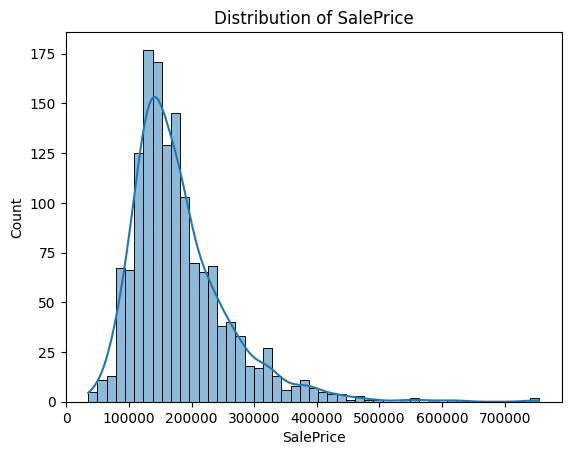

<ipython-input-4-c3495adb6d1e>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
<ipython-input-4-c3495adb6d1e>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr


Top features correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Linear Regression Evaluation:
Mean Absolute Error (MAE): 24774.22
Mean Squared Error (MSE): 1558239575.15
Root Mean Squared Error (RMSE): 39474.54
R^2 Score: 0.80

Random Forest Regressor Evaluation:
Mean Absolute Error (MAE): 19033.52
Mean Squared Error (MSE): 877299148.12
Root Mean Squared Error (RMSE): 29619.24
R^2 Score: 0.89

Feature Importances (Random Forest):
        Feature  Importance
0   OverallQual    0.571173
1     GrLivArea    0.167310
4   TotalBsmtSF    0.064771
5      1stFlrSF    0.050780
3    GarageArea    0.036385
8     YearBuilt    0.034905
9  YearRemodAdd    0.029833
2    GarageCars    0.018407
7  TotRmsAbvGrd    0.015145
6      FullBath    0.01129

In [4]:
# Write your code here
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load datasets
train_data = pd.read_csv('train.csv')  # Replace with correct path to training dataset
test_data = pd.read_csv('test.csv')   # Replace with correct path to testing dataset

# Step 1: Exploratory Data Analysis (EDA)
print("Dataset overview:")
print(train_data.head())
print(train_data.info())

# Check for missing values
missing = train_data.isnull().sum()
print("\nMissing Values:")
print(missing[missing > 0].sort_values(ascending=False))

# Visualize target variable (SalePrice)
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Step 2: Data Cleaning
# Impute missing values for numerical columns with median
for col in train_data.select_dtypes(include=['float64', 'int64']).columns:
    train_data[col].fillna(train_data[col].median(), inplace=True)

# Impute missing values for categorical columns with mode
for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Convert categorical variables to dummy/indicator variables
train_data = pd.get_dummies(train_data, drop_first=True)

# Step 3: Feature Selection
# Correlation with SalePrice
correlation = train_data.corr()['SalePrice'].sort_values(ascending=False)
print("\nTop features correlated with SalePrice:")
print(correlation.head(10))

# Selecting top correlated features for regression
selected_features = correlation.index[1:11]  # Top 10 correlated features excluding SalePrice
X = train_data[selected_features]
y = train_data['SalePrice']

# Step 4: Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Develop Regression Models
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_val)

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_val)

# Step 6: Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Evaluation:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R^2 Score: {r2_score(y_true, y_pred):.2f}")

evaluate_model(y_val, y_pred_lin, "Linear Regression")
evaluate_model(y_val, y_pred_rf, "Random Forest Regressor")

# Step 7: Feature Importance (for Random Forest)
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):")
print(feature_importances)


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [5]:
# Write your code here
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Load the data
data = pd.read_csv('train.csv')  # Replace with the correct file path
# Combine relevant columns if needed
data['text'] = data[['Neighborhood', 'SaleCondition']].fillna('').agg(' '.join, axis=1)

# Use annotated SalePrice median-based sentiment as ground truth
median_price = data['SalePrice'].median()
data['label'] = data['SalePrice'].apply(lambda x: 'positive' if x > median_price else 'negative')

# Extract text and labels
texts = data['text'].tolist()
ground_truth = data['label'].tolist()

# Initialize the sentiment analysis pipeline using DistilBERT
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Perform sentiment analysis in a zero-shot setting
predictions = []
for text in texts:
    result = classifier(text)[0]  # Get the first prediction (output as a dictionary)
    predictions.append(result['label'].lower())  # Convert to lowercase to match ground truth

# Evaluate the model's performance
accuracy = accuracy_score(ground_truth, predictions)
precision = precision_score(ground_truth, predictions, average='macro')
recall = recall_score(ground_truth, predictions, average='macro')
f1 = f1_score(ground_truth, predictions, average='macro')

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("\nClassification Report:")
print(classification_report(ground_truth, predictions))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Evaluation Metrics:
Accuracy: 0.418
Precision: 0.418
Recall: 0.419
F1 Score: 0.418

Classification Report:
              precision    recall  f1-score   support

    negative       0.42      0.40      0.41       732
    positive       0.42      0.43      0.43       728

    accuracy                           0.42      1460
   macro avg       0.42      0.42      0.42      1460
weighted avg       0.42      0.42      0.42      1460

